In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/yamin/Desktop/dataset"

CATEGORIES = ["fifty","hundred","ten","twenty"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))# convert to array
        print(img_array.shape)
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  
    break  

(2048, 1536, 3)


<Figure size 640x480 with 1 Axes>

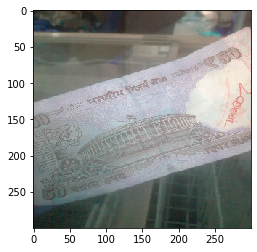

In [20]:
IMG_SIZE = 300

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()


In [21]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0-9)

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 437/437 [00:34<00:00, 12.69it/s]


1732


In [22]:
import random

random.shuffle(training_data)

In [23]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[31 25 27]
   [30 26 31]
   [30 28 30]
   ...
   [47 52 55]
   [49 52 54]
   [61 59 58]]

  [[32 26 31]
   [31 26 35]
   [31 30 37]
   ...
   [53 58 57]
   [54 57 55]
   [57 55 54]]

  [[33 30 32]
   [30 28 34]
   [26 25 32]
   ...
   [56 57 54]
   [59 58 48]
   [60 54 55]]

  ...

  [[ 9  7  6]
   [12  8  7]
   [11  6  6]
   ...
   [ 8  6  8]
   [10  8  8]
   [ 9  7  7]]

  [[ 9  7  7]
   [11  8  8]
   [10  6  6]
   ...
   [11  7  7]
   [10  5  6]
   [ 9  7  7]]

  [[11 11 11]
   [10  8  8]
   [12  8  9]
   ...
   [ 6  5  5]
   [ 9  8  8]
   [12  6  8]]]]


In [24]:
import pickle

pickle_out = open("Xcurrencyrgb.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("ycurrencyrgb.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("Xcurrencyrgb.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("ycurrencyrgb.pickle","rb")
y = pickle.load(pickle_in)

(300, 300, 3)


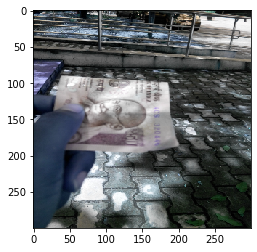

image is of : 0


In [27]:
new_array=X[5]
print(new_array.shape)
a=X[5].reshape(IMG_SIZE, IMG_SIZE,3)
plt.imshow(a)
plt.show()
print("image is of : "+str(y[5]))